# Melting temp distributions in seqwalk libraries

Running all cells of `library_generation.ipynb` will generate files with sequences that can be analyzed by running this notebook. No adjustments of filenames are necessary. 

In [1]:
from Bio.SeqUtils import MeltingTemp as mt
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib import rcParams

rcParams['figure.dpi'] = 300

In [2]:
def melt(seq):
    return mt.Tm_NN(seq)

In [3]:
d = {
    "Alphabet" : [],
    "k" : [],
    "L" : [],
    "MT" : []
}

for SSM_k in [6, 8, 10]:
    for L in [10, 15, 25]:
        for a in [3, 4]:
            filename = "SSM_%d-L_%d-a_%d" % (SSM_k, L, a)
            f = open(filename, "r")
            seqs = [s.strip() for s in f.readlines()]
            f.close
            for seq in seqs:
                d["Alphabet"].append(a)
                d["k"].append(SSM_k)
                d["L"].append(L)
                d["MT"].append(melt(seq))

data = pd.DataFrame(d)
data.to_csv("melting_temps.csv")

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_ylabel'

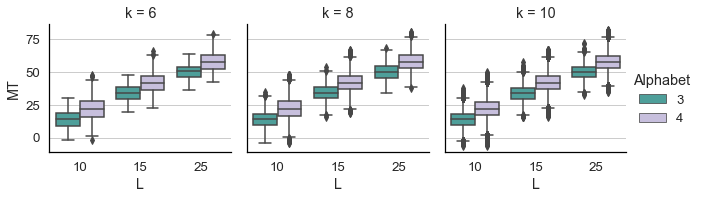

In [4]:
sns.set(font_scale=1.2, style='whitegrid')
rcParams['axes.edgecolor'] = 'black'
g = sns.catplot(data = data, y = "MT", x="L", col="k", hue="Alphabet",
                kind="box", height=3, aspect=1,
               palette=['#40ada6', '#c4bae2'])
plt.set_ylabel('Melting temp (C)')
plt.savefig("EF2_sn5.pdf", bbox_inches = 'tight')